# pandas 高级应用

### 分类数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
values = pd.Series(['apple', 'orange', 'apple', 'apple']*2)

In [3]:
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [4]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [5]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

许多数据系统（数据仓库、统计计算或其它应用）都发展出了特定的表征重复
值的方法，以进行高效的存储和计算。在数据仓库中，最好的方法是使用所谓
的包含不同值得维表(Dimension Table)，将主要的参数存储为引用维表整数
键：

In [6]:
values = pd.Series([0, 1, 0, 0]*2)

In [7]:
dim = pd.Series(['apple', 'orange'])

In [8]:
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [9]:
dim

0     apple
1    orange
dtype: object

In [10]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

这种用整数表示的方法称为分类或字典编码表示法。不同值得数组称为分类、
字典或数据级。

## pandas 的分类类型

In [11]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [12]:
N = len(fruits)

In [13]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15,size=N),
                   'weight': np.random.uniform(0, 4,size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])

In [14]:
df

,basket_id,fruit,count,weight
0,0,apple,3,0.994049
1,1,orange,6,2.478546
2,2,apple,11,2.669485
3,3,apple,12,2.394847
4,4,apple,3,1.357721
5,5,orange,5,0.634051
6,6,apple,12,2.668598
7,7,apple,5,0.679836


这里，df['fruit']是一个 Python 字符串对象的数组。我们可以通过调用它，
将它转变为分类

In [15]:
fruit_cat = df['fruit'].astype('category')

In [16]:
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

fruit_cat 的值不是 NumPy 数组，而是一个 pandas.Categorical 实例：

In [17]:
c = fruit_cat.values

In [18]:
type(c)

pandas.core.arrays.categorical.Categorical

分类对象有 categories 和 codes 属性：

In [19]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [20]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

你可将 DataFrame 的列通过分配转换结果，转换为分类：

In [21]:
df['fruit'] = df['fruit'].astype('category')

In [22]:
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

还可以从其它 Python 序列直接创建 pandas.Categorical：

In [23]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])

In [24]:
my_categories

[foo, bar, baz, foo, bar]
Categories (3, object): [bar, baz, foo]

如果你已经从其它源获得了分类编码，你还可以使用 from_codes 构造器

In [25]:
categories = ['foo', 'bar', 'baz']

In [26]:
codes = [0, 1, 2, 0, 0, 1]

In [27]:
my_cats_2 = pd.Categorical.from_codes(codes, categories)

In [28]:
my_cats_2

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo, bar, baz]

与显示指定不同，分类变换不认定指定的分类顺序。因此取决于输入数据的顺
序，categories 数组的顺序会不同。当使用 from_codes 或其它的构造器时，
你可以指定分类一个有意义的顺序：

In [29]:
ordered_cat = pd.Categorical.from_codes(codes, categories,ordered=True)

In [30]:
ordered_cat

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

输出[foo < bar < baz]指明‘foo’位于‘bar’的前面，以此类推。无序的分
类实例可以通过 as_ordered 排序：

In [31]:
my_cats_2.as_ordered()

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

最后要注意，分类数据不需要字符串，尽管我仅仅展示了字符串的例子。分类
数组可以包括任意不可变类型。

## 用分类进行计算

与非编码版本（比如字符串数组）相比，使用 pandas 的 Categorical 有些类
似。某些 pandas 组件，比如 groupby 函数，更适合进行分类。还有一些函数可
以使用有序标志位。

来看一些随机的数值数据，使用 pandas.qcut 面元函数。它会返回
pandas.Categorical，我们之前使用过 pandas.cut，但没解释分类是如何工作
的：

In [32]:
np.random.seed(12345)

In [33]:
draws = np.random.randn(1000)

In [34]:
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

计算这个数据的分位面元，提取一些统计信息

In [35]:
bins = pd.qcut(draws, 4)

In [36]:
bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

虽然有用，确切的样本分位数与分位的名称相比，不利于生成汇总。我们可以
使用 labels 参数 qcut，实现目的：

In [37]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [38]:
bins

[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [39]:
bins.codes[:10]

array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

加上标签的面元分类不包含数据面元边界的信息，因此可以使用 groupby 提取
一些汇总信息

In [40]:
bins = pd.Series(bins, name='quartile')

In [41]:
bins

0      Q2
1      Q3
2      Q2
3      Q2
4      Q4
5      Q4
6      Q3
7      Q3
8      Q4
9      Q4
10     Q4
11     Q1
12     Q3
13     Q3
14     Q4
15     Q4
16     Q1
17     Q2
18     Q4
19     Q2
20     Q2
21     Q3
22     Q4
23     Q1
24     Q2
25     Q3
26     Q3
27     Q3
28     Q3
29     Q4
       ..
970    Q2
971    Q1
972    Q2
973    Q4
974    Q3
975    Q1
976    Q1
977    Q2
978    Q2
979    Q3
980    Q3
981    Q1
982    Q3
983    Q4
984    Q2
985    Q4
986    Q1
987    Q4
988    Q1
989    Q3
990    Q1
991    Q4
992    Q1
993    Q4
994    Q2
995    Q3
996    Q2
997    Q1
998    Q3
999    Q4
Name: quartile, Length: 1000, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [42]:
results = (pd.Series(draws).groupby(bins).agg(['count', 'min', 'max']).reset_index())

In [43]:
results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


In [44]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

# 用分类提高性能

如果你是在一个特定数据集上做大量分析，将其转换为分类可以极大地提高效
率。DataFrame 列的分类使用的内存通常少的多。来看一些包含一千万元素的
Series，和一些不同的分类：

In [45]:
N = 10000000

In [46]:
draws = pd.Series(np.random.randn(N))

In [47]:
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

现在，将标签转换为分类

In [48]:
categories = labels.astype('category')

这时，可以看到标签使用的内存远比分类多：

In [49]:
labels.memory_usage()

80000080

In [50]:
categories.memory_usage()

10000272

转换为分类不是没有代价的，但这是一次性的代价

In [51]:
%time _ = labels.astype('category')

Wall time: 359 ms


GroupBy 操作明显比分类快，是因为底层的算法使用整数编码数组，而不是字
符串数组。

## 分类方法

包含分类数据的 Series 有一些特殊的方法，类似于 Series.str 字符串方法。
它还提供了方便的分类和编码的使用方法。看下面的 Series：

In [52]:
s = pd.Series(['a', 'b', 'c', 'd']*2)

In [53]:
cat_s = s.astype('category')

In [54]:
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

特别的 cat 属性提供了分类方法的入口

In [55]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [56]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

假设我们知道这个数据的实际分类集，超出了数据中的四个值。我们可以使用
set_categories 方法改变它们：

In [57]:
actual_categories = ['a', 'b', 'c', 'd', 'e']

In [58]:
cat_s2 = cat_s.cat.set_categories(actual_categories)

In [59]:
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): [a, b, c, d, e]

虽然数据看起来没变，新的分类将反映在它们的操作中。例如，如果有的话，
value_counts 表示分类：

In [60]:
cat_s2.value_counts()

d    2
c    2
b    2
a    2
e    0
dtype: int64

In [61]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

在打数据集中，分类经常作为节省内存和高性能的便捷工具。过滤完大
DataFrame 或 Series 之后，许多分类可能不会出现在数据中。我们可以使用
remove_unused_categories 方法删除没看到的分类：

In [62]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

In [63]:
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): [a, b, c, d]

In [64]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): [a, b]

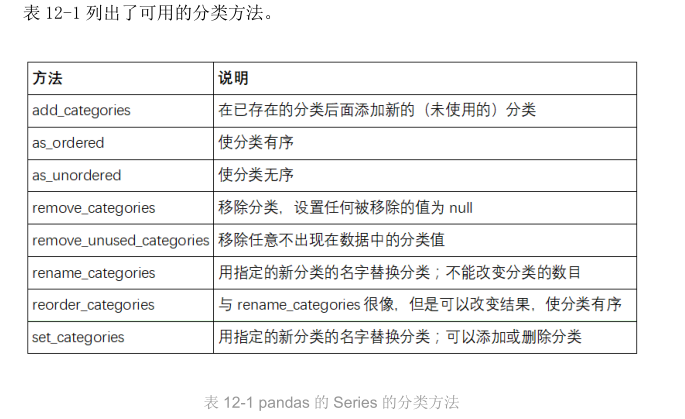

## 为建模创建虚拟变量

当你使用统计或机器学习工具时，通常会将分类数据转换为虚拟变量，也称为
one-hot 编码。这包括创建一个不同类别的列的 DataFrame；这些列包含给定分
类的 1s，其它为 0

In [65]:
cat_s = pd.Series(['a', 'b', 'c', 'd']*2, dtype='category')

pandas.get_dummies 函数可以转换这个以为分类数据为
包含虚拟变量的 DataFrame：

In [66]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


# GroupBy 高级应用

### 分组转换和“解封”GroupBy

transform 方法，它与 apply 很像，但是对使用的函数有一定限制

     它可以产生向分组形状广播标量值

     它可以产生一个和输入组形状相同的对象

     它不能修改输入

In [67]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                  'value': np.arange(12.)})

In [68]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [69]:
g = df.groupby('key').value

In [70]:
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

假设我们想产生一个和 df['value']形状相同的 Series，但值替换为按键分组
的平均值。我们可以传递函数 lambda x: x.mean()进行转换

In [71]:
g.transform(lambda x: x.mean())

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

对于内置的聚合函数，我们可以传递一个字符串假名作为 GroupBy 的 agg 方
法：

In [72]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

与 apply 类似，transform 的函数会返回 Series，但是结果必须与输入大小相
同。举个例子，我们可以用 lambda 函数将每个分组乘以 2：

In [73]:
g.transform(lambda x :x *2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

再举一个复杂的例子，我们可以计算每个分组的降序排名：

In [74]:
g.transform(lambda x: x.rank(ascending=False))

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

看一个由简单聚合构造的的分组转换函数：

In [75]:
def normalize(x):
    return (x - x.mean()) / x.std()

 transform 或 apply 可以获得等价的结果：

In [76]:
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [77]:
g.apply(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

内置的聚合函数，比如 mean 或 sum，通常比 apply 函数快，也比 transform
快。这允许我们进行一个所谓的解封（unwrapped）分组操作

In [78]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [79]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')

In [80]:
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

内置的聚合函数，比如 mean 或 sum，通常比 apply 函数快，也比 transform
快。这允许我们进行一个所谓的解封（unwrapped）分组操作

## 分组的时间重采样

对于时间序列数据，resample 方法从语义上是一个基于内在时间的分组操作。
下面是一个示例表：

In [81]:
N = 15

In [83]:
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=N)

In [84]:
df = pd.DataFrame({'time': times,
                  'value': np.arange(N)})

In [85]:
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


我们可以用 time 作为索引，然后重采样

In [86]:
df.set_index('time').resample('5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [88]:
df.set_index('time').resample('3min').count()

,value
time,
2017-05-20 00:00:00,3
2017-05-20 00:03:00,3
2017-05-20 00:06:00,3
2017-05-20 00:09:00,3
2017-05-20 00:12:00,3


假设 DataFrame 包含多个时间序列，用一个额外的分组键的列进行标记

In [89]:
df2 = pd.DataFrame({'time': times.repeat(3),
                   'key': np.tile(['a', 'b', 'c'], N),
                   'value': np.arange(N * 3.)})

In [91]:
df2[:7]

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


要对每个 key 值进行相同的重采样，我们引入 pandas.TimeGrouper 对象

In [92]:
time_key = pd.TimeGrouper('5min')

C:\Users\69547\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


我们然后设定时间索引，用 key 和 time_key 分组，然后聚合

In [93]:
resampled = (df2.set_index('time').groupby(['key', time_key]).sum())

In [94]:
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [95]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


使用 TimeGrouper 的限制是时间必须是 Series 或 DataFrame 的索引

# 链式编程技术

当对数据集进行一系列变换时，你可能发现创建的多个临时变量其实并没有在
分析中用到。看下面的例子

In [96]:
df = load_data()

NameError: name 'load_data' is not defined